# H&M Personalized Fashion Recommendations

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import gc

In [2]:
# Importing the files

# Data consisting of the purchases of each customer for each date
transactions_train = pd.read_csv("transactions_train.csv")
# Detailed metadata for each article_id available for purchase
articles = pd.read_csv("articles.csv")
# Metadata for each customer_id in dataset
customers = pd.read_csv("customers.csv")


#### **Articles**

- The Articles file contains information about all the products that are sold.
- There are **1,05,542** products present in the data.
- There are **24 features** which contain information about each product.

The features can be grouped into three categories:

- **Basic information about the Product and it's Category**:

  - `product_code`, `prod_name`, `product_type_no`, `product_type_name`, `product_group_name` 

- **Visual Classification of the products**:

  - **Graphical Appearance**: <br>
    `graphical_appearance_no`,`graphical_appearance_name` <br>

  - **Colour**: <br>
    `colour_group_code`, `colour_group_name`,`perceived_colour_value_id`, `perceived_colour_value_name`, `perceived_colour_master_id`, `perceived_colour_master_name`

- **Classification of Products by Department:**

  - **Department**: <br>
    `department_no`, `department_name`, <br>

  - **Shop Index** : <br>
    `index_code`, `index_name`, `index_group_no`, `index_group_name`

  - **Section** : <br>
    `section_no`, `section_name`<br>

  - **Garment group**: <br>
    `garment_group_no`, `garment_group_name`, `detail_desc`<br>


In [7]:
print(articles.shape)
articles.tail()

(105542, 25)


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.
105541,959461001,959461,Lounge dress,265,Dress,Garment Full body,1010016,Solid,11,Off White,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,Calf-length dress in ribbed jersey made from a...


#### **Customers**

- The Customers file contains information about all the products that are sold.
- There is information about **13,71,980 customers** present in the data.
- There are 6 features which contain information about each customer.

- **Information about whether the customer has subscribed to the Fashion News Updates**:

  - `FN`, `Active`, `club_member_status`, `fashion_news_frequency` <br>

- **Age**

- **Postal_code**


In [8]:
print(customers.shape)
customers.head()

(1371980, 7)


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


#### **Transactions**

- There are **3,17,88,324** past transactions of customers from the years 2020 to 2022 present in the data.
- There are 4 features which contain information about each transaction.
- The transaction data is related to the articles and customer data using `customer_id` and `article_id`.

* **Transaction Date:**

  - `t_dat`

* **Customer and Product information:**

  - `customer_id`, `article_id`, `price`

* **Sales Channel (Online/ Offline)**
  - `sales_channel_id`


In [9]:
print(transactions.shape)
transactions.head()

(31788324, 5)


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [10]:
# Defining Helper Functions


def missing_data(data):
    """
    missing_data Computes Percentage of Missing Values for the dataframe

    Parameters
    ----------
    data : dataframe
        Dataframe for which the missing value percentages need to be computed.

    Returns
    -------
    missing_df: dataframe
        Dataframe with missing value percentages.
    """
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(
        ascending=False
    )
    missing_df = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
    return missing_df


def unique_values(data):
    """
    unique_values Computes total and unique value counts per feature.

    Parameters
    ----------
    data : dataframe
        Data for which total and unique value counts per feature need to be calulated.

    Returns
    -------
    tt : dataframe
        Dataframe with total and unique value counts per feature.
    """
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ["Total"]
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt["Uniques"] = uniques
    return tt


##### Check for Missing Values

In [11]:
# 416 products have missing descriptions (Only 0.4% of the data)
missing_data(articles)


,Total,Percent
detail_desc,416,0.394156
perceived_colour_master_name,0,0.000000
garment_group_name,0,0.000000
garment_group_no,0,0.000000
section_name,0,0.000000
section_no,0,0.000000
index_group_name,0,0.000000
index_group_no,0,0.000000
index_name,0,0.000000
index_code,0,0.000000


In [12]:
# Only customer id and postal code are completely filled. Age, fashion news frequency have around 1% missing data, FN has 65% missing and Active has 66% missing data.
missing_data(customers)

,Total,Percent
Active,907576,66.150819
FN,895050,65.237831
fashion_news_frequency,16009,1.166854
age,15861,1.156066
club_member_status,6062,0.441843
customer_id,0,0.000000
postal_code,0,0.000000


In [13]:
# No missing data from transactions data
missing_data(transactions)

,Total,Percent
t_dat,0,0.0
customer_id,0,0.0
article_id,0,0.0
price,0,0.0
sales_channel_id,0,0.0


##### Unique Values

In [14]:
unique_values(articles)

,Total,Uniques
article_id,105542,105542
product_code,105542,47224
prod_name,105542,45875
product_type_no,105542,132
product_type_name,105542,131
product_group_name,105542,19
graphical_appearance_no,105542,30
graphical_appearance_name,105542,30
colour_group_code,105542,50
colour_group_name,105542,50


We observe that features for which we expect to have the same number of unique values, like:

- product_type_no and product_type_name,
- departmant_no and department_name,
- section_no and section_name

  have different number of unique values, which might means that we might have categories with same name.
  
  Others, like:
- index_code and index_name,
- garment_group_no and garment_group_name
  have the same number of unique values.


In [15]:
unique_values(customers)

,Total,Uniques
customer_id,1371980,1371980
FN,476930,1
Active,464404,1
club_member_status,1365918,3
fashion_news_frequency,1355971,4
age,1356119,84
postal_code,1371980,352899


In [16]:
unique_values(transactions)

,Total,Uniques
t_dat,31788324,734
customer_id,31788324,1362281
article_id,31788324,104547
price,31788324,9857
sales_channel_id,31788324,2


We observe that not all the customers (in the customer data) have transactions in the transaction data.
As well as, not all articles are represented in this data. It is interesting that the number of different prices is quite small, out of 31.7M transactions, and for 1.3M customers, buying 104K different articles. Same for the dates, there are only 734 different dates. Let's check some stats here.


In [17]:
print(f"Percentage of articles present in the transactions data: {round(transactions.article_id.nunique()/articles.article_id.nunique()*100, 2)}%")
print(f"Percentage of customers present in the transactions data: {round(transactions.customer_id.nunique()*100/customers.customer_id.nunique(), 2)}%")

Percentage of articles present in the transactions data: 99.06%
Percentage of customers present in the transactions data: 99.29%


#### **Preprocessing**

In [18]:
# There is a mistake in data entry where NONE and None have been entered differently
print(customers.fashion_news_frequency.value_counts())
customers.loc[customers["fashion_news_frequency"] == "NONE","fashion_news_frequency"] = "None"
customers.fashion_news_frequency.value_counts()

NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64


None         877713
Regularly    477416
Monthly         842
Name: fashion_news_frequency, dtype: int64

#### **EDA**

In [19]:
# Most popular products
articles.prod_name.value_counts()[0:10]

Dragonfly dress          98
Mike tee                 72
Wow printed tee 6.99     70
1pk Fun                  55
TP Paddington Sweater    54
Pria tee                 51
Despacito                48
MY                       44
Robin 3pk Fancy          43
DANTE set                42
Name: prod_name, dtype: int64

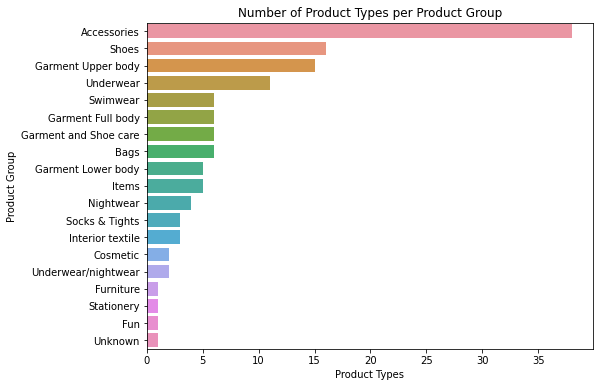

In [20]:
# Number of Product Types per Product Group
prod_grps = articles.groupby(["product_group_name"])["product_type_name"].nunique()
df = pd.DataFrame({"Product Group": prod_grps.index, "Product Types": prod_grps.values})
df = df.sort_values(["Product Types"], ascending=False)
plt.figure(figsize=(8, 6))
plt.title("Number of Product Types per Product Group")
sns.set_color_codes("pastel")
s = sns.barplot(x="Product Types", y="Product Group", data=df)
locs, labels = plt.xticks()
plt.show()


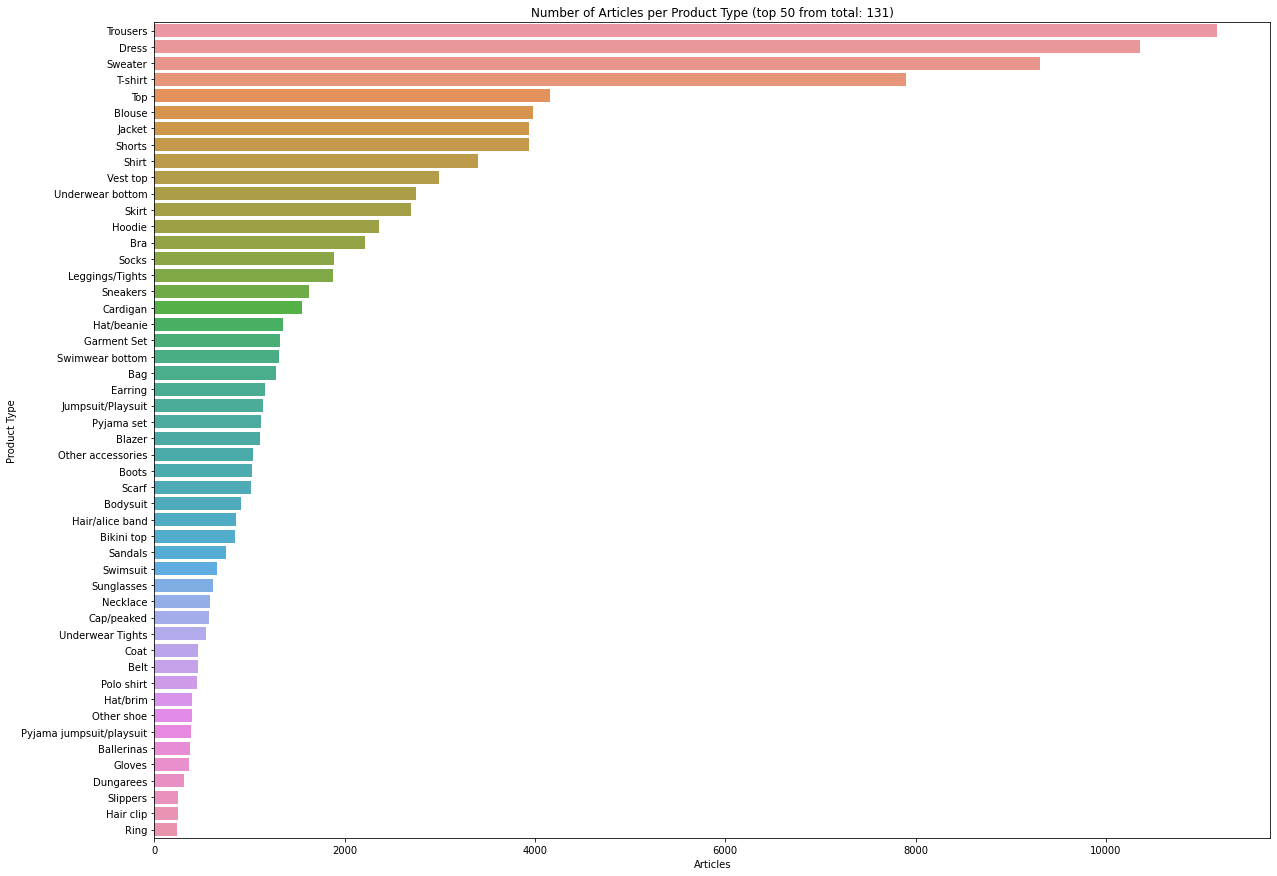

In [21]:
# Number of Articles per Product Type
prod_types = articles.groupby(["product_type_name"])["article_id"].nunique()
df = pd.DataFrame({"Product Type": prod_types.index, "Articles": prod_types.values})
total_types = len(df["Product Type"].unique())
df = df.sort_values(["Articles"], ascending=False)[0:50]
plt.figure(figsize=(20, 15))
plt.title(f"Number of Articles per Product Type (top 50 from total: {total_types})")
sns.set_color_codes("pastel")
s = sns.barplot(y="Product Type", x="Articles", data=df)
locs, labels = plt.xticks()
plt.show()


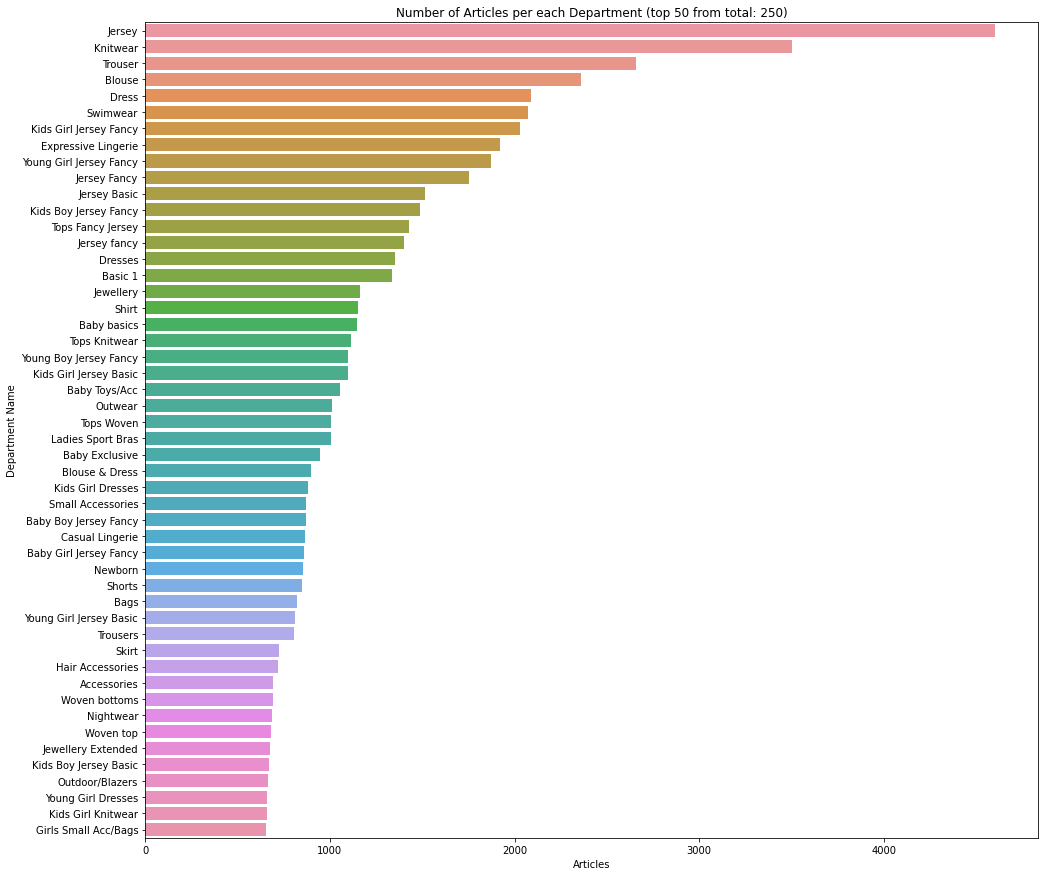

In [22]:
# Number of Articles per Department
temp = articles.groupby(["department_name"])["article_id"].nunique()
df = pd.DataFrame({"Department Name": temp.index, "Articles": temp.values})
total_depts = len(df["Department Name"].unique())
df = df.sort_values(["Articles"], ascending=False).head(50)
plt.figure(figsize=(16, 15))
plt.title(f"Number of Articles per each Department (top 50 from total: {total_depts})")
sns.set_color_codes("pastel")
s = sns.barplot(y="Department Name", x="Articles", data=df)
locs, labels = plt.xticks()
plt.show()


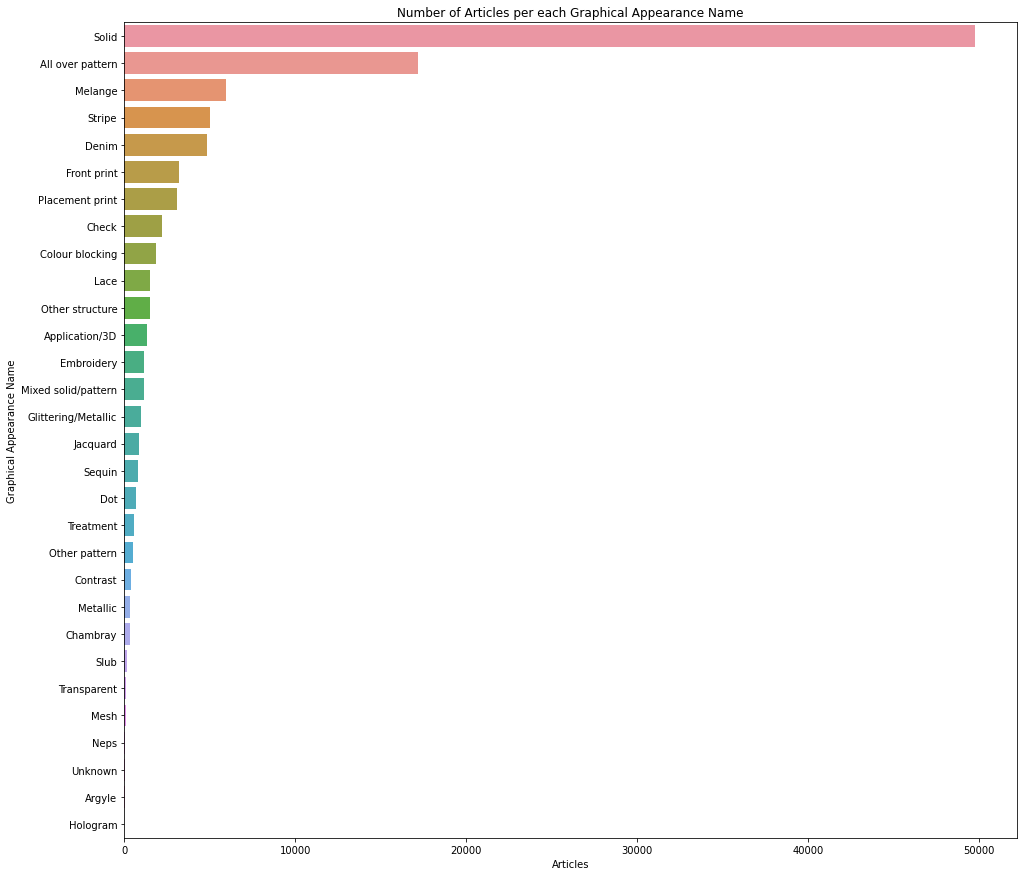

In [23]:
# Number of Articles per Graphical Appearance Name
temp = articles.groupby(["graphical_appearance_name"])["article_id"].nunique()
df = pd.DataFrame({"Graphical Appearance Name": temp.index, "Articles": temp.values})
df = df.sort_values(["Articles"], ascending=False).head(50)
plt.figure(figsize=(16, 15))
plt.title(f"Number of Articles per each Graphical Appearance Name")
sns.set_color_codes("pastel")
s = sns.barplot(y="Graphical Appearance Name", x="Articles", data=df)
locs, labels = plt.xticks()
plt.show()


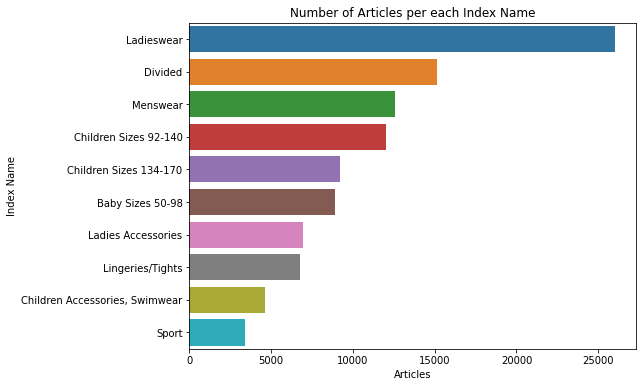

In [24]:
# Number of Articles per Index Name
temp = articles.groupby(["index_name"])["article_id"].nunique()
df = pd.DataFrame({"Index Name": temp.index, "Articles": temp.values})
df = df.sort_values(["Articles"], ascending=False)
plt.figure(figsize=(8, 6))
plt.title(f"Number of Articles per each Index Name")
sns.set_color_codes("bright")
s = sns.barplot(y="Index Name", x="Articles", data=df)
locs, labels = plt.xticks()
plt.show()


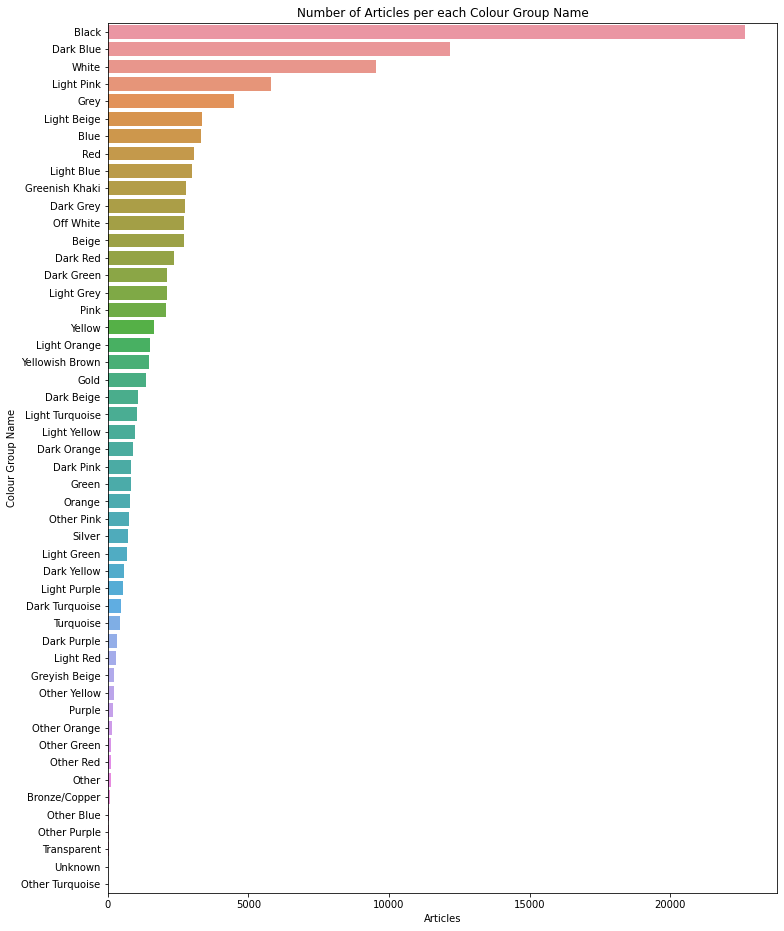

In [25]:
# Number of Articles per Index Group Name
temp = articles.groupby(["colour_group_name"])["article_id"].nunique()
df = pd.DataFrame({"Colour Group Name": temp.index, "Articles": temp.values})
df = df.sort_values(["Articles"], ascending=False)
plt.figure(figsize=(12, 16))
plt.title(f"Number of Articles per each Colour Group Name")
sns.set_color_codes("pastel")
s = sns.barplot(y="Colour Group Name", x="Articles", data=df)
locs, labels = plt.xticks()
plt.show()


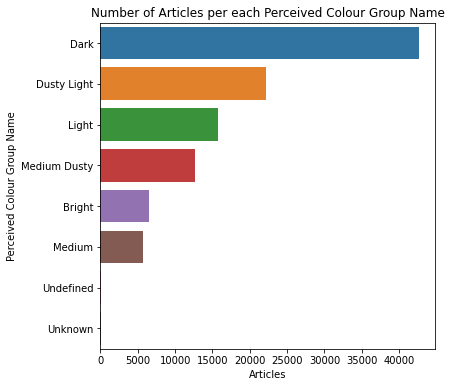

In [26]:
# Number of Articles per Perceived Colour Name
temp = articles.groupby(["perceived_colour_value_name"])["article_id"].nunique()
df = pd.DataFrame({"Perceived Colour Group Name": temp.index, "Articles": temp.values})
df = df.sort_values(["Articles"], ascending=False)
plt.figure(figsize=(6, 6))
plt.title(f"Number of Articles per each Perceived Colour Group Name")
sns.set_color_codes("pastel")
s = sns.barplot(y="Perceived Colour Group Name", x="Articles", data=df)
locs, labels = plt.xticks()
plt.show()


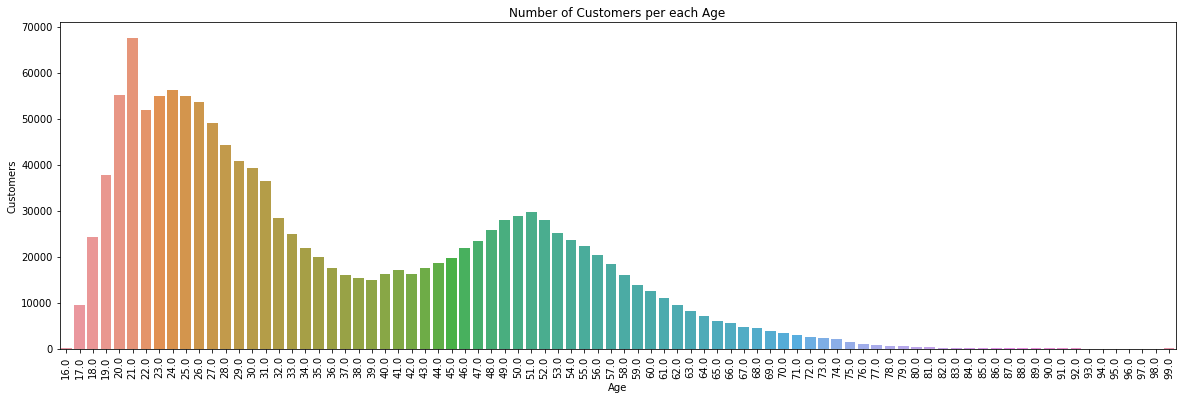

In [27]:
# Distibution of Customers across Age Group
temp = customers.groupby(["age"])["customer_id"].count()
df = pd.DataFrame({"Age": temp.index, "Customers": temp.values})
df = df.sort_values(["Age"], ascending=False)
plt.figure(figsize=(20, 6))
plt.title(f"Number of Customers per each Age")
sns.set_color_codes("pastel")
s = sns.barplot(x="Age", y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
locs, labels = plt.xticks()
plt.show()


None         877713
Regularly    477416
Monthly         842
Name: fashion_news_frequency, dtype: int64


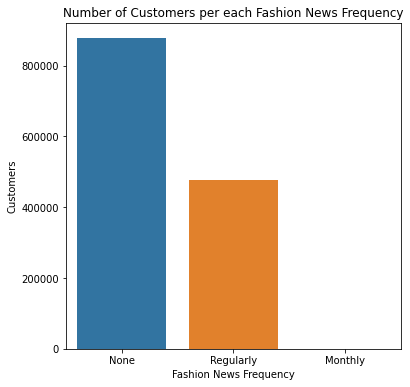

In [28]:
# # Number of customers and thier Fashion News Frequency
print(customers.fashion_news_frequency.value_counts())
temp = customers.groupby(["fashion_news_frequency"])["customer_id"].count()
df = pd.DataFrame({"Fashion News Frequency": temp.index, "Customers": temp.values})
df = df.sort_values(["Customers"], ascending=False)
plt.figure(figsize=(6, 6))
plt.title(f"Number of Customers per each Fashion News Frequency")
sns.set_color_codes("pastel")
s = sns.barplot(x="Fashion News Frequency", y="Customers", data=df)
locs, labels = plt.xticks()
plt.show()


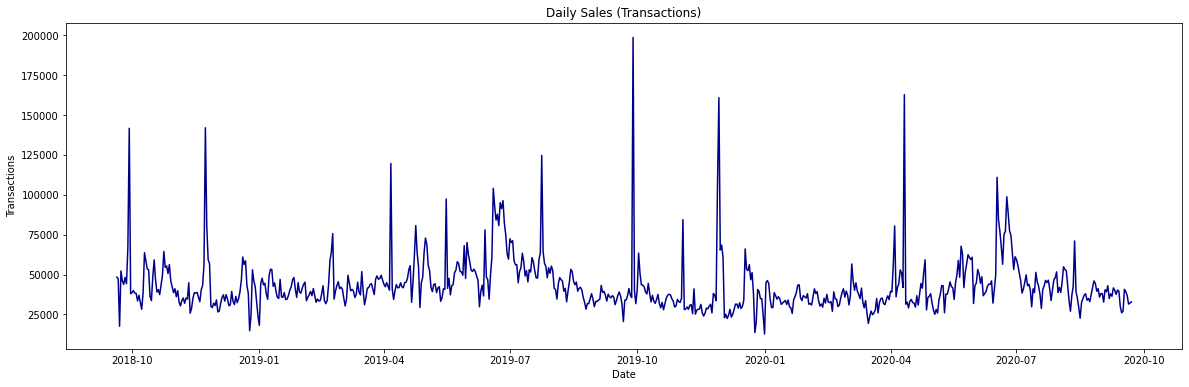

In [29]:
# Daily Sales (Transactions)
df = transactions.groupby(["t_dat"])["article_id"].count().reset_index()
df["t_dat"] = df["t_dat"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
df.columns = ["Date", "Transactions"]
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
plt.plot(df["Date"], df["Transactions"], color="Darkblue")
plt.xlabel("Date")
plt.ylabel("Transactions")
plt.title(f"Daily Sales (Transactions)")
plt.show()


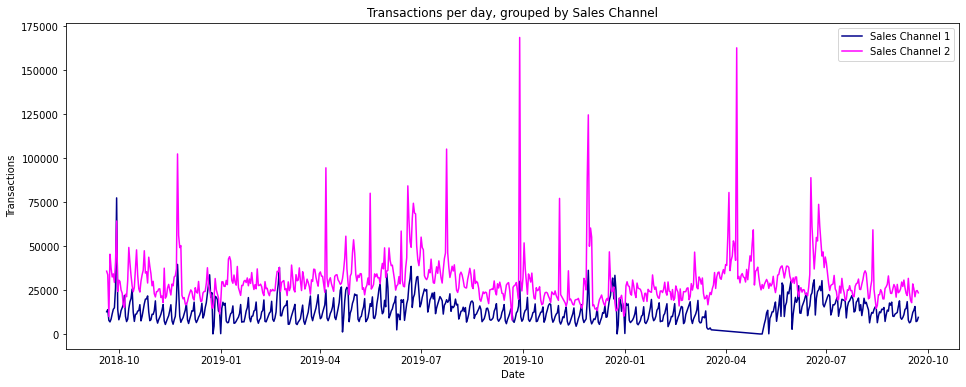

In [30]:
# Distribution of the transactions over time
df = (
    transactions.groupby(["t_dat", "sales_channel_id"])["article_id"]
    .count()
    .reset_index()
)
df["t_dat"] = df["t_dat"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
df.columns = ["Date", "Sales Channel Id", "Transactions"]
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
g1 = ax.plot(
    df.loc[df["Sales Channel Id"] == 1, "Date"],
    df.loc[df["Sales Channel Id"] == 1, "Transactions"],
    label="Sales Channel 1",
    color="Darkblue",
)
g2 = ax.plot(
    df.loc[df["Sales Channel Id"] == 2, "Date"],
    df.loc[df["Sales Channel Id"] == 2, "Transactions"],
    label="Sales Channel 2",
    color="Magenta",
)
plt.xlabel("Date")
plt.ylabel("Transactions")
ax.legend()
plt.title(f"Transactions per day, grouped by Sales Channel")
plt.show()


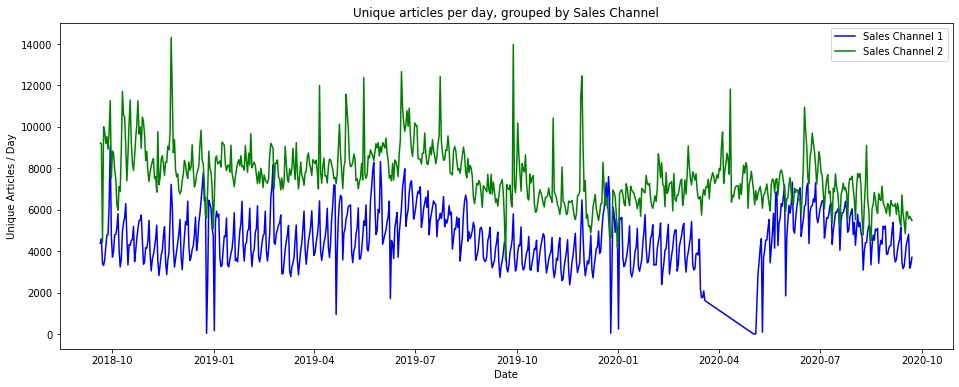

In [31]:
# Distribution of Number of Unique articles sold each day
df = (
    transactions.groupby(["t_dat", "sales_channel_id"])["article_id"]
    .nunique()
    .reset_index()
)
df["t_dat"] = df["t_dat"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
df.columns = ["Date", "Sales Channel Id", "Unique Articles"]
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
g1 = ax.plot(
    df.loc[df["Sales Channel Id"] == 1, "Date"],
    df.loc[df["Sales Channel Id"] == 1, "Unique Articles"],
    label="Sales Channel 1",
    color="Blue",
)
g2 = ax.plot(
    df.loc[df["Sales Channel Id"] == 2, "Date"],
    df.loc[df["Sales Channel Id"] == 2, "Unique Articles"],
    label="Sales Channel 2",
    color="Green",
)
plt.xlabel("Date")
plt.ylabel("Unique Articles / Day")
ax.legend()
plt.title(f"Unique articles per day, grouped by Sales Channel")
plt.show()
